XAI FOR REGRESSION

In [ ]:
# !pip install shap lime

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()
import lime, lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
data = pd.read_csv('powerplant_energy_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ambient_temparature  9568 non-null   float64
 1   exhaust_vaccum       9568 non-null   float64
 2   ambient_pressure     9568 non-null   float64
 3   relative_humidity    9568 non-null   float64
 4   energy_output        9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
data.shape

(9568, 5)

In [ ]:
X = data.drop('energy_output', axis=1)
y = data['energy_output']

In [ ]:
X.head()

,ambient_temparature,exhaust_vaccum,ambient_pressure,relative_humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [ ]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: energy_output, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176,)
(2392, 4)
(2392,)


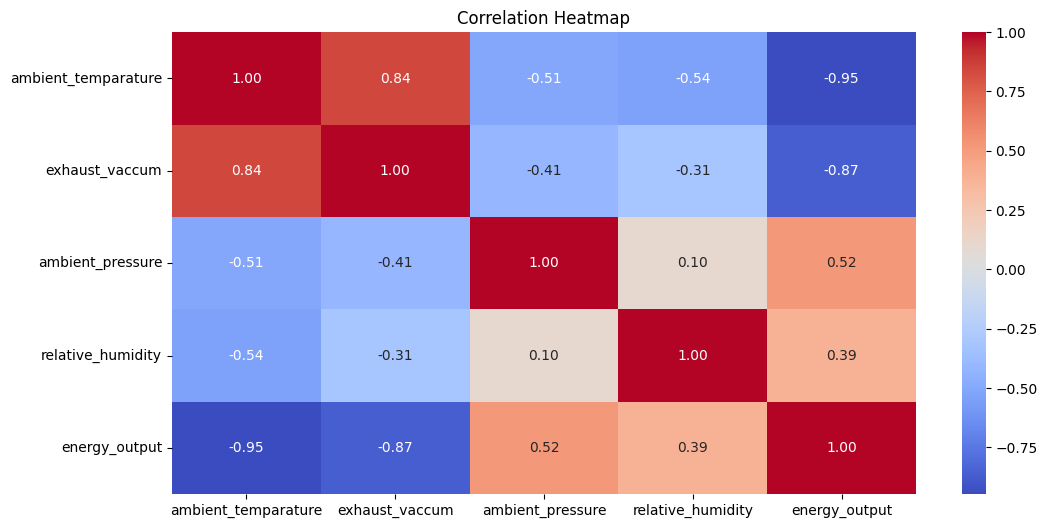

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [77]:
if len(X) > 1000:
  exp_data = X.head(1000)
else: exp_data = X

In [75]:
shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(exp_data)
print(f"SHAP values dimernsions : {shap_values.shape}")

feature_names = X_train.columns.tolist()
lime_explainer = LimeTabularExplainer(X_train.values, mode='regression', feature_names=feature_names)

(1000, 4)


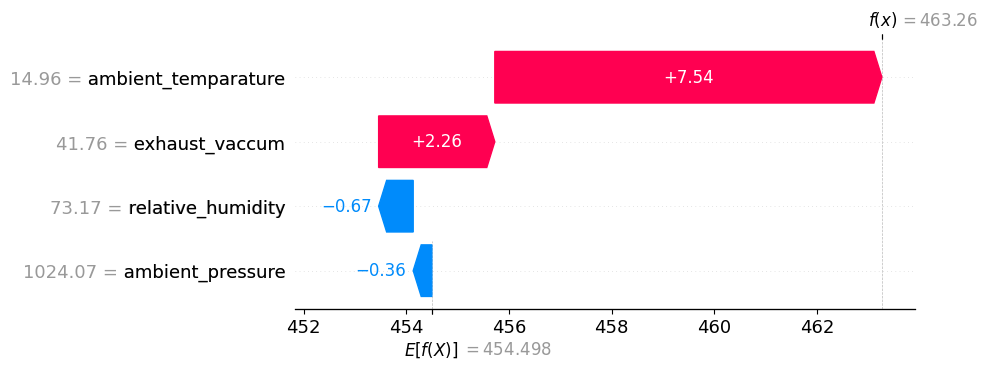

In [71]:
shap.plots.waterfall(shap_values[0])

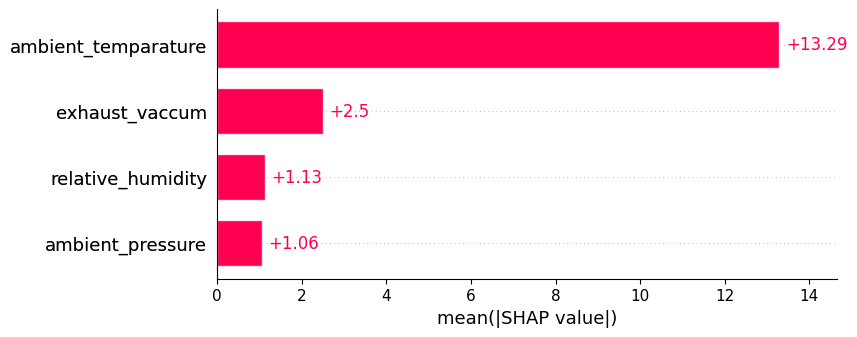

In [ ]:
shap.plots.bar(shap_values)

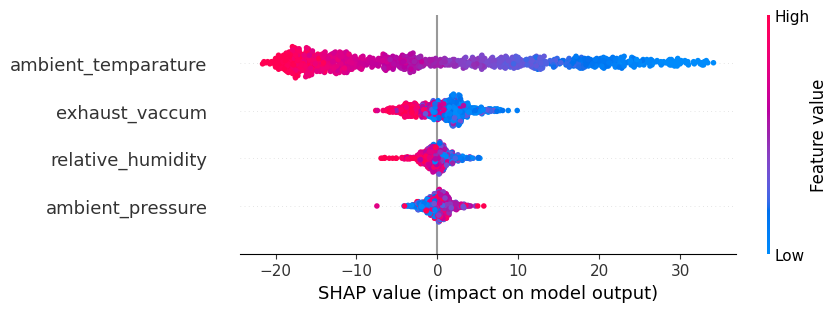

In [ ]:
shap.plots.beeswarm(shap_values)

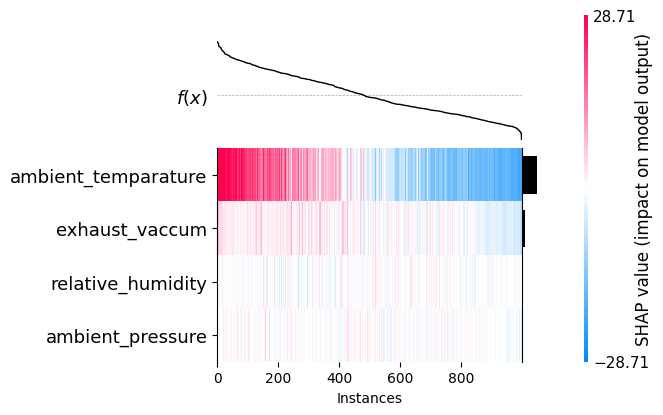

In [ ]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


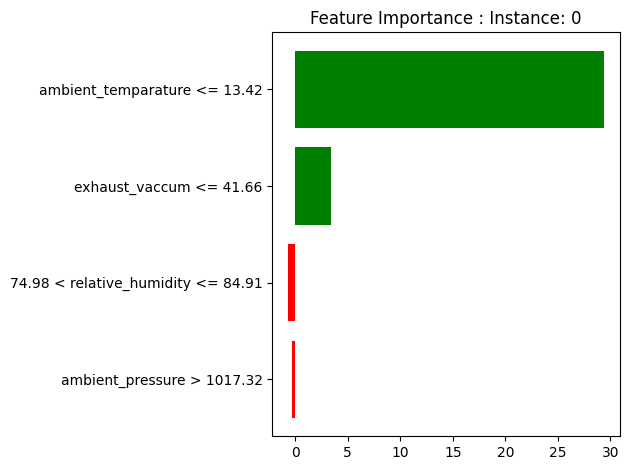


                              Feature     Weight
0        ambient_temparature <= 13.42  29.402275
1             exhaust_vaccum <= 41.66   3.359149
2  74.98 < relative_humidity <= 84.91  -0.662960
3          ambient_pressure > 1017.32  -0.318112


In [ ]:
explanation = lime_explainer.explain_instance(X_test.iloc[1], model.predict)
explanation.as_pyplot_figure()
plt.title(f'Feature Importance : Instance: {1}')
plt.tight_layout()
plt.show()

print()

df = pd.DataFrame(explanation.as_list(), columns=['Feature', 'Weight'])
print(df)